#Travel Insurance KNN Prediction Model
Who is likely to purchase travel insurance?

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
from google.colab import files 
upload = files.upload()

Saving TravelInsurance.csv to TravelInsurance.csv


In [3]:
insurance_data = pd.read_csv("TravelInsurance.csv")

In [4]:
# Viewing data 
insurance_data.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [6]:
# Viewing null values 
insurance_data.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [7]:
insurance_data.TravelInsurance.unique()

array([0, 1])

In [8]:
# Renaming column names 
insurance_data.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [9]:
insurance_data.columns = insurance_data.rename(columns = {'Unnamed: 0' : 'Unnamed:0', 'Employment Type' : 'EmploymentType'}).columns

In [10]:
# Viewing renamed columns
insurance_data.head()

,Unnamed:0,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [11]:
insurance_data.TravelInsurance.value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

In [12]:
# Dropping columns 
insurance_data.drop(['Unnamed:0'], axis = 1, inplace = True)

In [13]:
# Viewing updated data 
insurance_data.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Creating numerical and categorical features

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [15]:
numerical_features = insurance_data.select_dtypes(include = 'int64').columns
categorical_features = insurance_data.select_dtypes(include = 'object').columns

In [16]:
print(numerical_features)
print(categorical_features)

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'TravelInsurance'],
      dtype='object')
Index(['EmploymentType', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')


## Creating Pipeline constructor and Column transformer 

In [17]:
# Pipeline constructor 
numeric_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'median'))])

categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')), 
    ('onehot', OneHotEncoder(drop = 'first'))
])

In [18]:
# Column transformer 
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(transformers= [
    ('numeric', numeric_transformer, numerical_features),
    ('categorical', categorical_transformer, categorical_features)
])

In [19]:
# Fit and transform dataset 
column_transformer_data = column_transformer.fit_transform(insurance_data)
column_transformer_data

array([[3.10e+01, 4.00e+05, 6.00e+00, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       [3.10e+01, 1.25e+06, 7.00e+00, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       [3.40e+01, 5.00e+05, 4.00e+00, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [2.80e+01, 1.15e+06, 6.00e+00, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       [3.40e+01, 1.00e+06, 6.00e+00, ..., 1.00e+00, 1.00e+00, 1.00e+00],
       [3.40e+01, 5.00e+05, 4.00e+00, ..., 1.00e+00, 0.00e+00, 0.00e+00]])

In [20]:
# Use extract_feature_names method to get the feature names in order to create the final transformed_data_df
def extract_feature_names(columnTransformerProcessor):
    '''Get feature names from the processed columnTransformer'''

    output_features = []

    for name, pipe, features in columnTransformerProcessor.transformers_:
        if name!='remainder':
            for i in pipe:
                trans_features = []
                if hasattr(i,'categories_'):
                    trans_features.extend(i.get_feature_names_out(features))
                else:
                    trans_features = features
            output_features.extend(trans_features)

    return output_features

In [21]:
column_transformer_names = extract_feature_names(column_transformer)
column_transformer_names

['Age',
 'AnnualIncome',
 'FamilyMembers',
 'ChronicDiseases',
 'TravelInsurance',
 'EmploymentType_Private Sector/Self Employed',
 'GraduateOrNot_Yes',
 'FrequentFlyer_Yes',
 'EverTravelledAbroad_Yes']

In [22]:
transformed_insurance_data = pd.DataFrame(column_transformer_data, columns = column_transformer_names)

In [45]:
# View new transformed data
transformed_insurance_data .head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,EmploymentType_Private Sector/Self Employed,GraduateOrNot_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes
0,31.0,400000.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0
1,31.0,1250000.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0
2,34.0,500000.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0
3,28.0,700000.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0
4,28.0,700000.0,8.0,1.0,0.0,1.0,1.0,1.0,0.0


## Defining feature matrix 

In [24]:
X = transformed_insurance_data.drop(['TravelInsurance'], axis = 1)
y = transformed_insurance_data['TravelInsurance']

## Split data into testing and training datasets 

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# StandardScaler to scale and fit our training data to prevent leakeage and hierachy 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [27]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
len(X_train)

1390

In [33]:
len(y_test)

597

## Building KNN Model

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

### Creating Gridsearch

In [35]:
# Defining our paramgrid 
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors' : range(1,21)}

In [36]:
knn_grid = GridSearchCV(knn_model, param_grid, cv = 10, scoring = 'accuracy')

In [37]:
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)}, scoring='accuracy')

In [38]:
pd.DataFrame(knn_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001447,0.000311,0.003767,0.000297,1,{'n_neighbors': 1},0.741007,0.733813,0.719424,0.726619,0.741007,0.683453,0.784173,0.697842,0.755396,0.798561,0.738129,0.033467,20
1,0.001510,0.000267,0.003942,0.000532,2,{'n_neighbors': 2},0.798561,0.741007,0.748201,0.741007,0.748201,0.705036,0.834532,0.755396,0.820144,0.798561,0.769065,0.039200,18
2,0.001412,0.000081,0.004327,0.001068,3,{'n_neighbors': 3},0.812950,0.690647,0.791367,0.719424,0.712230,0.705036,0.812950,0.791367,0.805755,0.805755,0.764748,0.048266,19
3,0.001501,0.000200,0.004406,0.000775,4,{'n_neighbors': 4},0.834532,0.769784,0.805755,0.733813,0.776978,0.748201,0.827338,0.798561,0.805755,0.834532,0.793525,0.033598,7
4,0.001349,0.000022,0.003986,0.000094,5,{'n_neighbors': 5},0.820144,0.748201,0.791367,0.741007,0.776978,0.733813,0.805755,0.769784,0.798561,0.827338,0.781295,0.031227,17
5,0.001845,0.000634,0.006952,0.003991,6,{'n_neighbors': 6},0.841727,0.769784,0.798561,0.748201,0.784173,0.733813,0.827338,0.791367,0.805755,0.820144,0.792086,0.032565,8
6,0.001662,0.000606,0.004388,0.000359,7,{'n_neighbors': 7},0.820144,0.755396,0.812950,0.741007,0.784173,0.733813,0.820144,0.762590,0.798561,0.820144,0.784892,0.032565,16
7,0.001382,0.000180,0.004082,0.000168,8,{'n_neighbors': 8},0.827338,0.784173,0.798561,0.712230,0.776978,0.741007,0.834532,0.791367,0.798561,0.812950,0.787770,0.035573,13
8,0.001419,0.000225,0.004154,0.000168,9,{'n_neighbors': 9},0.820144,0.791367,0.812950,0.705036,0.776978,0.741007,0.827338,0.762590,0.791367,0.827338,0.785612,0.038177,15
9,0.001623,0.000311,0.004782,0.000780,10,{'n_neighbors': 10},0.827338,0.798561,0.798561,0.741007,0.776978,0.741007,0.812950,0.784173,0.791367,0.827338,0.789928,0.029099,11


In [46]:
# Fidning best estimator 
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=19)

In [40]:
y_pred = knn_grid.predict(X_test_scaled)

## Results

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names = ['Will Purchase', 'Will Not Purchase']))

                   precision    recall  f1-score   support

    Will Purchase       0.76      0.93      0.84       375
Will Not Purchase       0.81      0.50      0.62       222

         accuracy                           0.77       597
        macro avg       0.78      0.72      0.73       597
     weighted avg       0.78      0.77      0.76       597



### Confusion Matrix, ROC Curve, AUC score

In [42]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, y_pred)

array([[348,  27],
       [110, 112]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


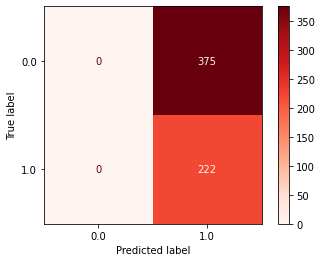

In [43]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(knn_grid, X_test, y_test, cmap= plt.cm.Reds)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'ROC Curve')

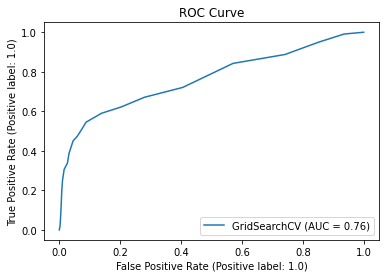

In [44]:
# ROC Curve & AUC score
from sklearn import metrics

metrics.plot_roc_curve(knn_grid, X_test_scaled, y_test)
plt.title('ROC Curve')